## Stock Price Columns Explained

### 🔹 1. Open
The price of the stock at the moment the market opens in the morning.  
** Shows how the day begins compared to the previous day.

### 🔹 2. High
The highest price the stock reached during the entire trading day.  
** Shows the strongest buying pressure.

### 🔹 3. Low
The lowest price the stock reached during the trading day.  
** Shows the strongest selling pressure.

### 🔹 4. Close
The last price of the stock when the market closes.  
** Most important price for indicators like SMA, EMA, RSI, MACD.

### 🔹 5. Volume
The number of shares traded (bought + sold) during the day.  
** High volume = strong market interest; low volume = weak interest.

### 🔹 6. Adjusted Close (Adj Close)
The close price corrected for stock splits and dividends.  
** Best price for long-term analysis and charts.

### Why We Need These Columns
- Technical indicators use Open, High, Low, Close (especially Close).  
- Volume helps confirm trends.  
- Adjusted Close keeps historical data accurate.



Below are the most commonly used technical indicators

---

## 🔹 1. SMA – Simple Moving Average

###  What it is
SMA is the **average closing price** over a number of days.

It smooths the price so you can see the **overall trend**.

### Why it matters
- Price above SMA → trend is going UP  
- Price below SMA → trend is going DOWN  

###  Example (Using 3 days)
Imagine the closing prices for 3 days:

| Day | Price |
|-----|--------|
| 1   | 10     |
| 2   | 12     |
| 3   | 11     |

SMA-3 = (10 + 12 + 11) ÷ 3 = **11**

This means the “average” price for the last 3 days is 11.

---

## 🔹 2. EMA – Exponential Moving Average

### What it is
EMA is like SMA, but it gives **more weight to recent prices**.

So it reacts **faster** to changes.

###  Why it matters
- Faster trend detection  
- Used in MACD  

### Example  
We use a smoothing factor:

For EMA-3:

α = 2 ÷ (3 + 1) = **0.5**

Assume previous EMA = 11  
Today’s price = 13

EMA = (0.5 × 13) + (0.5 × 11)  
EMA = **12**

This shows EMA moves faster in the direction of the newest price.

---

## 🔹 3. RSI – Relative Strength Index

###  What it is
RSI shows whether the stock is:

- **Overbought** (70+) → may fall  
- **Oversold** (30−) → may rise  

It measures the **speed of price movements**.

### Example With Table

| Day | Price | Change | Up | Down |
|-----|--------|---------|------|--------|
| 1→2 | 10→12 | +2 | 2 | 0 |
| 2→3 | 12→11 | -1 | 0 | 1 |
| 3→4 | 11→13 | +2 | 2 | 0 |
| 4→5 | 13→15 | +2 | 2 | 0 |
| 5→6 | 15→14 | -1 | 0 | 1 |
| 6→7 | 14→16 | +2 | 2 | 0 |

Average Gain = (2 + 0 + 2 + 2 + 0 + 2) ÷ 6 = **1.33**  
Average Loss = (0 + 1 + 0 + 0 + 1 + 0) ÷ 6 = **0.33**

RS = 1.33 ÷ 0.33 = **4**

RSI = 100 − (100 ÷ (1 + 4))  
RSI = 100 − 20 = **80**

➡️ **RSI = 80 → Overbought**
Stock may drop soon.

---

## 🔹 4. MACD – Moving Average Convergence Divergence

###  What it is
MACD uses two EMAs to show:

- Trend direction  
- Trend strength  
- Buy/sell signals  

###  Components
- **MACD Line = EMA12 − EMA26**  
- **Signal Line = EMA9 of MACD**  
- **Histogram = MACD − Signal**

###  Example (Simplified)
Assume:

- EMA12 = 13  
- EMA26 = 12  

MACD Line = 13 − 12 = **1**

If Signal Line = 0.8:  
Histogram = 1 − 0.8 = **0.2**

###  How traders use it
- MACD crossing above Signal → **BUY**  
- MACD crossing below Signal → **SELL**

---


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# TA-Lib for indicators
import talib

# PyNance and PyFolio will be used later, we just import them now
import talib                      # technical indicators
import pynance as py              # from GitHub version
import quantstats as qs   

# Make plots a bit nicer
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (12, 6)


Download TSLA data with yfinance

In [8]:
# ============================================
# Download TSLA daily data for a year
# ============================================

ticker = "TSLA"
start_date = "2023-01-01"
end_date   = "2023-12-31"

df = yf.download(ticker, start=start_date, end=end_date, progress=False) 
df.head()


/var/folders/nf/drxnv59536v7bnknmx3c_1zw0000gn/T/ipykernel_2318/3845431653.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2023-01-03,108.099998,118.800003,104.639999,118.470001,231402800
2023-01-04,113.639999,114.589996,107.519997,109.110001,180389000
2023-01-05,110.339996,111.750000,107.160004,110.510002,157986300
2023-01-06,113.059998,114.389999,101.809998,103.000000,220911100
2023-01-09,119.769997,123.519997,117.110001,118.959999,190284000


Flatten MultiIndex columns (if needed) and clean

In [9]:
# ============================================
# Clean the columns (handle MultiIndex case)
# ============================================

# If columns are MultiIndex (like: ('Close', 'TSLA')), flatten them
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)  # keep only first level: Open, High, etc.

print("Cleaned columns:", df.columns.tolist())

# Optional: add a Ticker column (useful if using multiple tickers later)
df["Ticker"] = ticker

# Ensure index is datetime and sorted
df.index = pd.to_datetime(df.index)
df = df.sort_index()

df.head()


Cleaned columns: ['Close', 'High', 'Low', 'Open', 'Volume']


Price,Close,High,Low,Open,Volume,Ticker
Date,,,,,,
2023-01-03,108.099998,118.800003,104.639999,118.470001,231402800,TSLA
2023-01-04,113.639999,114.589996,107.519997,109.110001,180389000,TSLA
2023-01-05,110.339996,111.750000,107.160004,110.510002,157986300,TSLA
2023-01-06,113.059998,114.389999,101.809998,103.000000,220911100,TSLA
2023-01-09,119.769997,123.519997,117.110001,118.959999,190284000,TSLA


EDA: price and volume

        count          mean           std           min           25%  \
Price                                                                   
Close   250.0  2.174752e+02  4.191680e+01  1.081000e+02  1.861225e+02   
High    250.0  2.216317e+02  4.245851e+01  1.117500e+02  1.899375e+02   
Low     250.0  2.126743e+02  4.183171e+01  1.018100e+02  1.829125e+02   
Open    250.0  2.170750e+02  4.228259e+01  1.030000e+02  1.863750e+02   
Volume  250.0  1.373516e+08  3.577549e+07  6.512520e+07  1.117632e+08   

                 50%           75%           max  
Price                                             
Close   2.221450e+02  2.530200e+02  2.933400e+02  
High    2.265550e+02  2.579925e+02  2.992900e+02  
Low     2.180200e+02  2.473950e+02  2.895200e+02  
Open    2.235650e+02  2.517875e+02  2.960400e+02  
Volume  1.286707e+08  1.579521e+08  3.065906e+08  


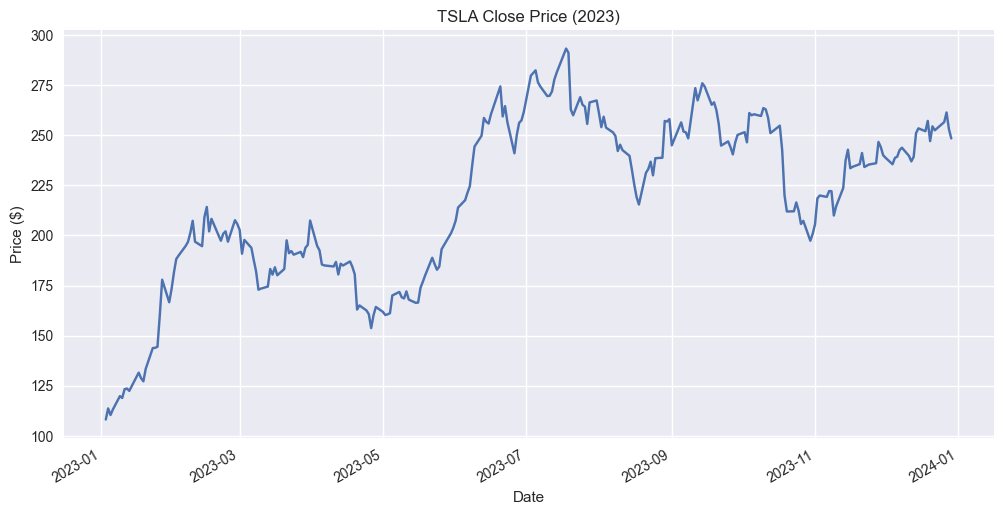

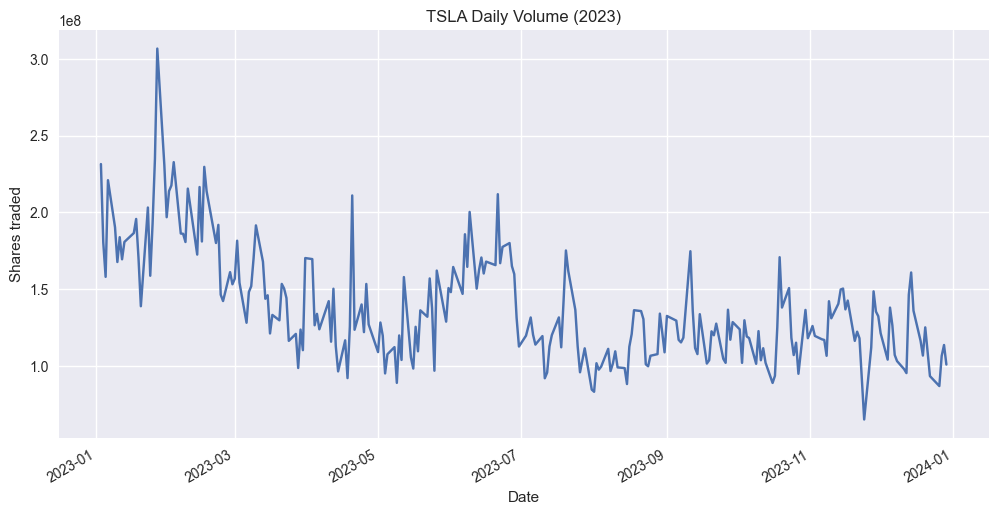

In [10]:
# ============================================
# Quick look at price and volume
# ============================================

print(df.describe().T)

# Close price chart
df["Close"].plot(title="TSLA Close Price (2023)")
plt.ylabel("Price ($)")
plt.show()

# Volume chart
df["Volume"].plot(title="TSLA Daily Volume (2023)")
plt.ylabel("Shares traded")
plt.show()


Add TA-Lib indicators

In [11]:
# ============================================
# Compute technical indicators with TA-Lib
# ============================================

# Use 'Adj Close' if available, otherwise 'Close'
if "Adj Close" in df.columns:
    price = df["Adj Close"]
else:
    price = df["Close"]

# --- Moving Averages ---
df["SMA_20"] = talib.SMA(price, timeperiod=20)
df["SMA_50"] = talib.SMA(price, timeperiod=50)
df["EMA_20"] = talib.EMA(price, timeperiod=20)

# --- RSI ---
df["RSI_14"] = talib.RSI(price, timeperiod=14)

# --- MACD ---
df["MACD"], df["MACD_signal"], df["MACD_hist"] = talib.MACD(
    price, fastperiod=12, slowperiod=26, signalperiod=9
)


df.tail()


Price,Close,High,Low,Open,Volume,Ticker,SMA_20,SMA_50,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist
Date,,,,,,,,,,,,,
2023-12-22,252.539993,258.220001,251.369995,256.760010,93370100,TSLA,244.503500,232.553000,244.955352,58.137457,5.223832,4.421232,0.802600
2023-12-26,256.609985,257.970001,252.910004,254.490005,86892400,TSLA,245.529999,232.662800,246.065317,60.824036,5.495891,4.636163,0.859727
2023-12-27,261.440002,263.339996,257.519989,258.350006,106494400,TSLA,246.265999,232.813200,247.529573,63.793640,6.031711,4.915273,1.116438
2023-12-28,253.179993,265.130005,252.710007,263.660004,113619900,TSLA,246.717999,232.779799,248.067708,55.978816,5.723858,5.076990,0.646868
2023-12-29,248.479996,255.190002,247.429993,255.100006,100891600,TSLA,247.137998,232.895800,248.106973,52.070118,5.042505,5.070093,-0.027588


Quick Reading 

Price action: TSLA climbed from 252.54 → 261.44 (Dec 27 peak), then pulled back to 248.48 by Dec 29.

Trend: SMA_20 (~244–247) stays well above SMA_50 (~232–233) → bullish medium-term trend.

Short-term strength: EMA_20 is slightly above SMA_20 and rising → recent prices are stronger than older ones.

Momentum (RSI & MACD):
RSI > 70 → Overbought (price may fall)

RSI < 30 → Oversold (price may rise)

RSI 50–70 → Bullish momentum

RSI 30–50 → Bearish/weak momentum

RSI_14 moves from 58 → 64, then cools to 52 → momentum was strong mid-week, then weakened.

> 0 → MACD above signal → bullish momentum
< 0 → MACD below signal → bearish momentum / loss of steam

MACD stays positive (~5–6) all week → overall bullish bias, but the drop from 6.03 to 5.04 shows momentum fading at the end.

Plot price + SMA

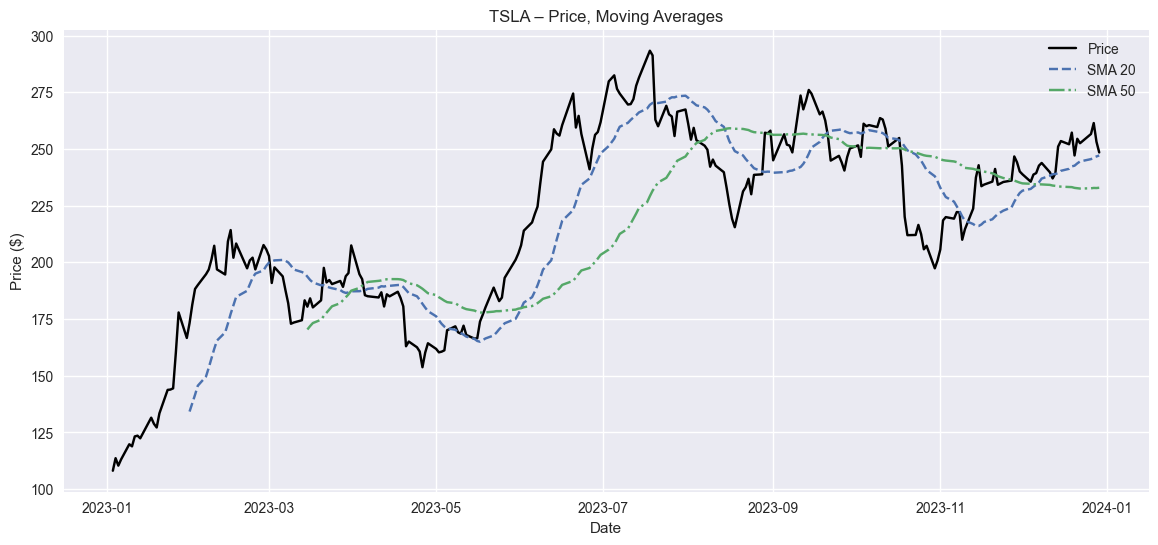

In [12]:
# ============================================
# Price + SMA + Bollinger Bands
# ============================================

fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(df.index, price, label="Price", color="black")
ax.plot(df.index, df["SMA_20"], label="SMA 20", linestyle="--")
ax.plot(df.index, df["SMA_50"], label="SMA 50", linestyle="-.")


ax.set_title("TSLA – Price, Moving Averages")
ax.set_xlabel("Date")
ax.set_ylabel("Price ($)")
ax.legend()
plt.show()


Plot RSI

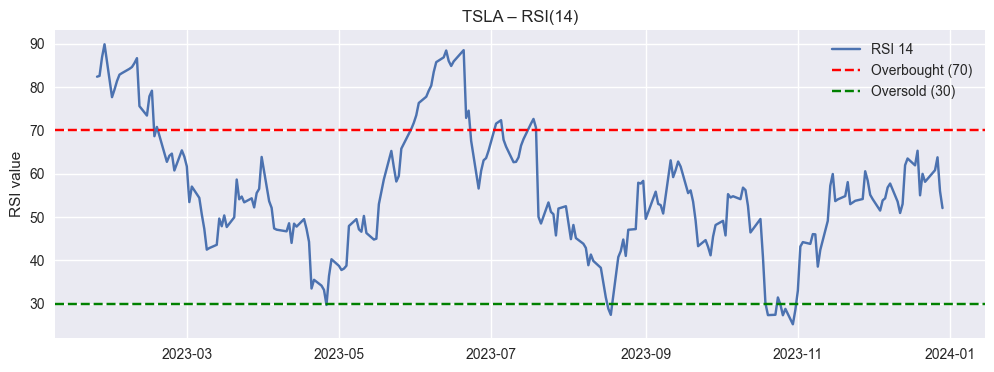

In [13]:
# ============================================
# RSI – Overbought / Oversold
# ============================================

fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(df.index, df["RSI_14"], label="RSI 14")
ax.axhline(70, color="red", linestyle="--", label="Overbought (70)")
ax.axhline(30, color="green", linestyle="--", label="Oversold (30)")

ax.set_title("TSLA – RSI(14)")
ax.set_ylabel("RSI value")
ax.legend()
plt.show()


Plot MACD

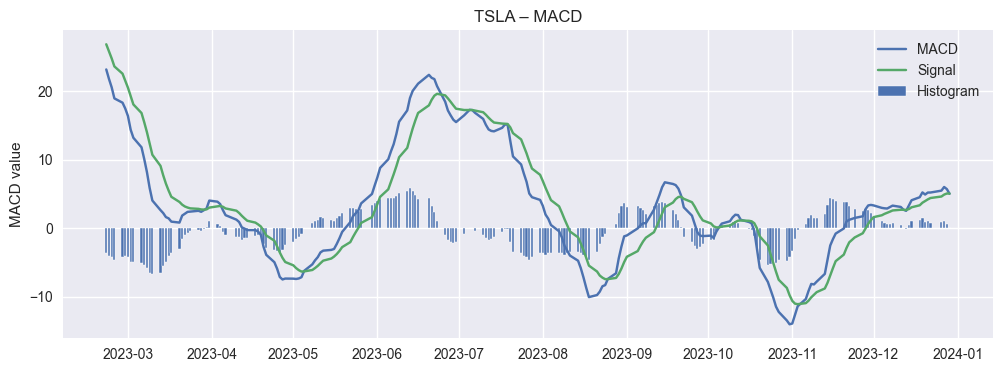

In [ ]:
# ============================================
# MACD – Trend & momentum
# ============================================

fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(df.index, df["MACD"], label="MACD")
ax.plot(df.index, df["MACD_signal"], label="Signal")
ax.bar(df.index, df["MACD_hist"], label="Histogram")

ax.set_title("TSLA – MACD")
ax.set_ylabel("MACD value")
ax.legend()
plt.show()


MACD vs Signal Crossovers
MACD crossing above Signal → bullish momentum starts
MACD crossing below Signal → bearish momentum starts

Histogram (Blue Bars)
Histogram > 0 → bullish momentum accelerating
Histogram < 0 → bearish momentum accelerating
Increasing bar height = momentum building
Decreasing bar height = momentum fading


Portfolio optimisation using PyNance

In [ ]:

from pynance import portfolio_optimizer as po

TICKERS = ["AAPL", "GC=F", "META", "NVDA","TSLA"]

portfolio = po.PortfolioCalculations(TICKERS)

print("=== Max Sharpe Portfolio (risk/return) ===")
print(portfolio.max_sharpe_portfolio("rr"))

print("\n=== Max Sharpe Portfolio weights ===")
print(portfolio.max_sharpe_portfolio("df").head())

print("\n=== Min Variance Portfolio (risk/return) ===")
print(portfolio.min_var_portfolio("rr"))

print("\n=== Min Variance Portfolio weights ===")
print(portfolio.min_var_portfolio("df").head())


/Users/mac/Documents/kaim/week1/.venv/lib/python3.13/site-packages/pynance/datasources/data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adj_close_data[-1] == 0:
/Users/mac/Documents/kaim/week1/.venv/lib/python3.13/site-packages/pynance/datasources/data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adj_close_data[-1] == 0:
/Users/mac/Documents/kaim/week1/.venv/lib/python3.13/site-packages/pynance/datasources/data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consi

=== Max Sharpe Portfolio (risk/return) ===
                   Max Sharpe Portfolio
Expected Return                  33.37%
Standard Deviation               15.62%

=== Max Sharpe Portfolio weights ===
     Portfolio Weight
AAPL            2.25%
GC=F           74.35%
META            0.00%
NVDA           21.06%
TSLA            2.33%

=== Min Variance Portfolio (risk/return) ===
                   Min Var Portfolio
Expected Return               20.81%
Standard Deviation            12.05%

=== Min Variance Portfolio weights ===
     Portfolio Weight
AAPL           22.86%
GC=F           68.90%
META            6.63%
NVDA            0.00%
TSLA            1.60%
